In [1]:
!pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


# Load final results

In [2]:
# Load DataFrame from pickle file
loaded_df = pd.read_pickle('results/model_output_valid.pkl')

loaded_df

,Labeled Data,Label,Model Output
0,NaN,NONE,"{\n""Explanation"": ""The text in this example do..."
1,\n,NONE,"{\n""Explanation"": ""Based on the text, the inte..."
2,And then Alex can weigh in his ideas.,NONE,"{""Explanation"": ""The text suggests that Alex h..."
3,"As Ally's career progresses, I have no doubt ...",NONE,"{\n""Explanation"": ""Transactional leadership is..."
4,Caleb did a lot of the work filming and editi...,NONE,"{\n""Explanation"": ""Based on the text given, it..."
...,...,...,...
6154,when discussing new project ideas for the futu...,STC,"{""Explanation"": ""Based on the provided text, i..."
6155,will also additionally take more responsibilit...,NONE,"{\n""Explanation"": ""Based on the provided text,..."
6156,worked collaboratively with the study abroad o...,NONE,"{\n""Labeled Data"": ""worked collaboratively wit..."
6157,worked solo\n,NONE,"{\n""Explanation"": ""Based on the provided text,..."


In [3]:
# Load DataFrame from pickle file
replaced_labels_df = pd.read_pickle('results/replaced_labels_df.pkl')

replaced_labels_df

,Labeled Data,Label,Model Output,IsValidJSON,Model Label
0,NaN,None,"{\n""Explanation"": ""The text in this example do...",True,None
1,\n,None,"{\n""Explanation"": ""Based on the text, the inte...",True,Transformational
2,And then Alex can weigh in his ideas.,None,"{""Explanation"": ""The text suggests that Alex h...",True,Transactional
3,"As Ally's career progresses, I have no doubt ...",None,"{\n""Explanation"": ""Transactional leadership is...",True,None
4,Caleb did a lot of the work filming and editi...,None,"{\n""Explanation"": ""Based on the text given, it...",True,Unknown
...,...,...,...,...,...
6154,when discussing new project ideas for the futu...,Transactional,"{""Explanation"": ""Based on the provided text, i...",True,Transactional
6155,will also additionally take more responsibilit...,None,"{\n""Explanation"": ""Based on the provided text,...",True,Transactional
6156,worked collaboratively with the study abroad o...,None,"{\n""Labeled Data"": ""worked collaboratively wit...",True,Transactional
6157,worked solo\n,None,"{\n""Explanation"": ""Based on the provided text,...",True,Neither


In [4]:
import pickle

# Open the file containing the pickled dictionary in read-binary mode
with open('results/invalid_json_counts.pkl', 'rb') as file:
    # Load the dictionary from the file
    invalid_json_counts = pickle.load(file)

print("Loaded dictionary:", invalid_json_counts)

Loaded dictionary: {2: 1077, 1: 4598, 3: 327, 4: 111, 5: 32, 7: 5, 6: 6, 8: 2, 10: 1}


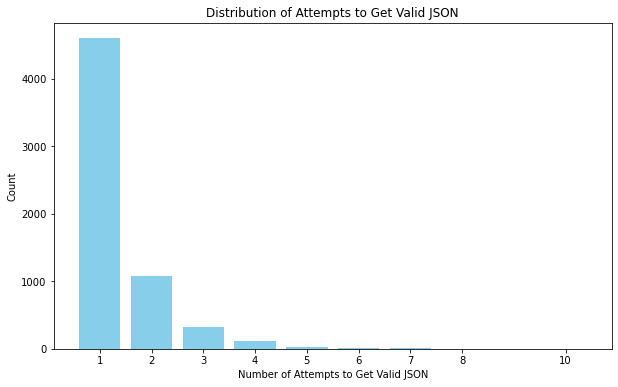

In [5]:
import matplotlib.pyplot as plt

# Sort the dictionary by keys (number of times a response had to be generated)
sorted_data = dict(sorted(invalid_json_counts.items()))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_data.keys(), sorted_data.values(), color='skyblue')
plt.xlabel('Number of Attempts to Get Valid JSON')
plt.ylabel('Count')
plt.title('Distribution of Attempts to Get Valid JSON')
plt.xticks(list(sorted_data.keys()))  # Set x-ticks to be the keys in the dictionary
plt.show()

In [6]:
# The number of rows to consider in the comparison
n = len(replaced_labels_df)
n = min(n, len(replaced_labels_df))

# Compare the columns and count matches for the first n rows
matches = (replaced_labels_df['Model Label'].iloc[:n] == replaced_labels_df['Label'].iloc[:n]).sum()

print(f"Number of matching labels in the first {n} rows: {matches}")

Number of matching labels in the first 6159 rows: 1800


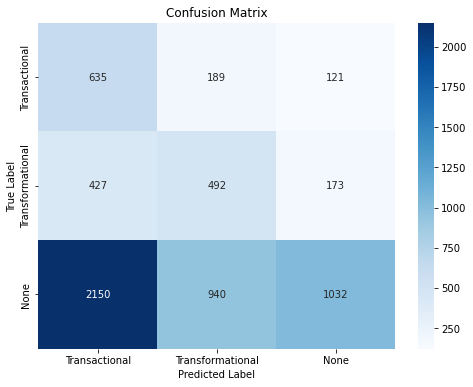

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.DataFrame(replaced_labels_df)

# Preprocess Data
# Replace invalid labels in 'Model Label' with 'None'
valid_labels = ['Transactional', 'Transformational', 'None']
df['Model Label'] = df['Model Label'].apply(lambda x: x if x in valid_labels else 'None')

# Create the Confusion Matrix
cm = confusion_matrix(df['Label'], df['Model Label'], labels=valid_labels)

# Calculate Accuracy
accuracy = accuracy_score(df['Label'], df['Model Label'])

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_labels, yticklabels=valid_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()